In [6]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


data = pd.read_csv('E:/databag/AgglomerativeClustering聚类(2到7)结果(2方无归非线性变化__).csv',index_col=0)

data1=data.drop('4个簇',axis=1)
data1
data2=data1.drop('5个簇',axis=1)
data3=data2.drop('6个簇',axis=1)
data4=data3.drop('7个簇',axis=1)
data5=data4.drop('3个簇',axis=1)
data6=data5.drop('2个簇',axis=1)
data6

,性别,肺活量,身高(cm),体重(kg),谷丙转氨酶(ALT)(U/L),总胆红素(TBIL)(umol/L),平均血小板体积(MPV)(fl),白细胞计数(WBC)(10^9/L),中性粒细胞绝对值(NE#)(10^9/L),中性粒细胞比值(NE%)(%),...,平均红细胞血红蛋白浓度(MCHC)(g/L),红细胞分布宽度变异系数(RDW_CV)(%),血小板计数(PLT)(10^9/L),血小板分布宽度(PDW)(%),大血小板比率(P-LCR)(%),中间细胞百分比(MID%)(%),中间细胞绝对值(MID#)(10^9/L),红细胞分布宽度(RDW-SD)(%),血压-高(mmHg),血压-低(mmHg)
0,4.0,6.425635,8.011253,5.255634,4.270993,4.272961,4.1616,4.663096,4.611932,6.108290,...,8.107278,4.903061,4.941559,4.974252,4.294939,4.991410,4.432133,5.062500,6.882526,5.366944
1,4.0,5.737696,8.260907,5.162479,4.291661,4.042673,6.8644,4.916824,4.682612,5.737233,...,7.385117,4.746173,5.000916,4.655133,5.373615,6.213468,5.121884,6.037551,6.882526,6.002500
2,4.0,6.425635,8.011253,5.508122,4.083191,4.036093,6.2500,4.663096,4.506920,5.662767,...,7.220092,4.622500,5.030728,5.444444,5.550683,5.901344,4.886427,7.079401,7.343431,5.921111
3,4.0,5.517036,8.229491,5.381137,4.201096,4.064095,7.7284,4.507929,4.368785,5.507159,...,5.563837,4.500459,5.060628,4.196290,8.830334,5.620369,4.656510,5.880625,6.657674,5.921111
4,4.0,6.308275,8.260907,5.444444,4.236266,4.245934,5.6644,4.949013,5.044074,7.169143,...,6.079424,4.440051,5.008361,6.479339,6.240254,5.856400,5.121884,7.290000,6.980034,5.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,9.0,5.626825,8.260907,5.733907,4.073393,4.138850,6.2500,5.928166,6.332236,8.497765,...,7.763242,5.126990,4.941559,5.906373,6.256966,4.861487,4.656510,6.575561,7.477862,7.111111
4047,4.0,4.881017,7.980316,5.766532,4.050386,4.053212,5.2900,4.087429,4.266595,6.298178,...,7.763242,5.760000,5.060628,5.586777,5.383951,5.459631,4.213296,6.161033,6.499352,7.562500
4048,4.0,5.962683,8.011253,5.701374,4.166072,4.054036,4.7524,6.395768,6.006517,6.776590,...,6.855603,7.406173,6.105257,5.586777,4.891613,6.164926,6.382271,7.641276,6.882526,6.587778
4049,4.0,4.778799,7.887863,5.162479,4.096465,4.144513,5.1984,5.013705,5.007323,6.712687,...,7.594021,5.897959,4.993477,5.501157,5.204499,5.530527,4.886427,7.900115,5.945168,5.062500


In [7]:

# 轮廓系数
silhouettes = []
#Calinski-Harabaz Index
scores = []
#Davies-Bouldin Index
davies_list = []
# 循环设置不同的聚类簇数
for i in range(4, 10):
    y_pre = np.array(data.iloc[:,23+i])
    # 轮廓系数
    silhouette = metrics.silhouette_score(data4, y_pre, metric='euclidean')
    silhouettes.append(silhouette)
    #Davies-Bouldin Index
    davies_list.append(davies_bouldin_score(data4,y_pre))
    #Calinski-Harabaz Index
    score = calinski_harabasz_score(data4,y_pre)
    scores.append(score)

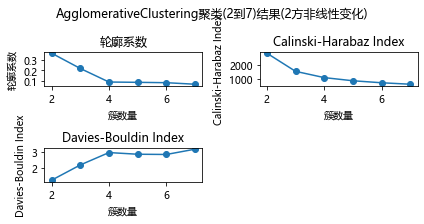

In [8]:

# 绘制轮廓系数曲线
plt.subplot(321)
plt.title('轮廓系数')
plt.plot(range(2, 8), silhouettes, marker='o')
plt.xlabel('簇数量')
plt.ylabel('轮廓系数')
# 绘制Calinski-Harabaz Index曲线
plt.subplot(322)
plt.title('Calinski-Harabaz Index')
plt.plot(range(2, 8),scores , marker='o')
plt.xlabel('簇数量')
plt.ylabel('Calinski-Harabaz Index')

# 绘制Davies-Bouldin Index曲线
plt.subplot(323)
plt.title('Davies-Bouldin Index')
plt.plot(range(2, 8),davies_list, marker='o')
plt.xlabel('簇数量')
plt.ylabel('Davies-Bouldin Index')

plt.suptitle('AgglomerativeClustering聚类(2到7)结果(2方非线性变化)')
plt.tight_layout()
plt.show()